## Calculating the Return of a Portfolio of Securities

Download data for a portfolio composed of 5 stocks. Do it for British Petroleum, Ford, Exxon, Lincoln, and Apple for the period ‘2000-1-1’ until today.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
import pandas as pd

In [2]:
tickers = ['BP', 'F', 'XOM', 'LNC', 'AAPL']
data = pd.DataFrame()
for ticker in tickers:
    data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2000-1-1')["Adj Close"]

In [3]:
data.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
1999-12-31,20.435431,15.001548,19.838707,23.453308,0.783791
2000-01-03,20.263165,14.737741,19.284636,22.903620,0.853355
2000-01-04,20.155497,14.245311,18.915260,22.243996,0.781409
2000-01-05,20.844566,14.298071,19.946440,21.474424,0.792844
2000-01-06,20.887640,14.315660,20.977619,21.867449,0.724232


In [4]:
data.tail()

,BP,F,XOM,LNC,AAPL
Date,,,,,
2022-10-17,30.480000,11.83,100.620003,48.740002,142.410004
2022-10-18,30.480000,12.03,100.800003,49.549999,143.750000
2022-10-19,30.900000,12.13,103.790001,48.470001,143.860001
2022-10-20,30.959999,11.77,103.930000,47.779999,143.389999
2022-10-21,31.360001,12.19,105.860001,50.380001,147.270004


### Normalization to 100:

$$
\frac {P_t}{P_0} * 100
$$

Normalize to a hundred and plot the data on a graph (you can apply the .loc() or the .iloc() method). 

<AxesSubplot:xlabel='Date'>

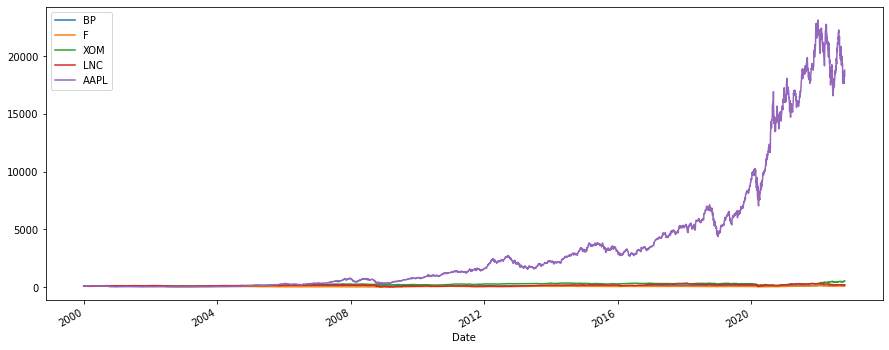

In [5]:
(data / data.iloc[0] * 100).plot(figsize=(15,6))

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [6]:
returns = (data/data.shift(1)) - 1
returns.head()

,BP,F,XOM,LNC,AAPL
Date,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN
2000-01-03,-0.008430,-0.017585,-0.027929,-0.023438,0.088754
2000-01-04,-0.005313,-0.033413,-0.019154,-0.028800,-0.084310
2000-01-05,0.034188,0.003704,0.054516,-0.034597,0.014633
2000-01-06,0.002066,0.001230,0.051697,0.018302,-0.086539


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [7]:
weights = [0.20, 0.20, 0.20, 0.20, 0.20]

Obtain the annual returns of each of the stocks and then calculate the dot product of these returns and the weights.

In [8]:
annual_returns = returns.mean() * 250

In [10]:
portfolio1 = np.dot(annual_returns, weights) 
portfolio1

0.14754583543752042

Transform the result into a percentage form. 

In [11]:
portfolio1 * 100

14.754583543752043

Is the return of this portfolio satisfactory?